**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ matplotlib 3.0.2
+ sklearn 0.20.2

# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [10]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

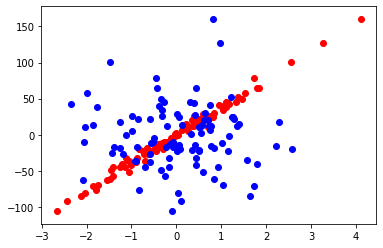

In [11]:
pylab.scatter(data[:,0], target, color = 'r') # указали один информативный признак, второй информации не несет
pylab.scatter(data[:,1], target, color = 'b') # отобразили целевое значение от первого признака и второго

In [7]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [12]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [13]:
print(test_labels)

[ -48.28700118  -12.98848753   13.02656201 -105.77758163   23.87701013
  -32.71074998   11.96165156   12.67156468   39.70663436  -21.47606913
  -52.37232463   41.95683853  -16.85466265  -16.30914909  -22.32195021
   38.36241814  -40.84204295  -16.79027112  -27.02798161  -80.80239408
   19.66406455   -4.38652971   25.24428409  -37.31870104  -18.86438755
  -84.32102748   22.13032804   18.17188553  -19.36956003    5.86887774]


In [14]:
print(predictions)

[ -56.49387702  -16.6927429    18.64348193 -102.72283564   31.64217327
  -43.88588959   13.79737289   13.99434317   37.739885    -18.13978235
  -41.04420306   43.60879959  -16.59962064  -12.26828097  -22.88201228
   41.36633035  -46.73057521  -14.99313078  -25.50022744  -78.88647827
   26.48648592   -5.12721594   14.57190133  -35.42558576  -19.02362112
  -81.93343251   19.93470381   18.28624636  -32.34666514    4.56282372]


In [15]:
metrics.mean_absolute_error(test_labels, predictions)

3.974084127398893

In [20]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779695, std: 1.0737104492890204


In [17]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [18]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779695, std: 1.0737104492890204


In [21]:
coef

array([38.07925837,  0.        ])

In [22]:
linear_regressor.coef_

array([38.41128815,  0.39877472])

In [23]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.5334872598123321

In [24]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [25]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.41*x1 + 0.40*x2 + -0.53


#### Lasso

In [27]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [28]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666398, std: 1.0170354384993354


In [29]:
print(lasso_regressor.coef_)

[37.68804351  0.        ]


In [30]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [33]:
print("y = {:.2f}*x1 + {:.2f}*x2+ {:.2f}".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1], 
                                                  lasso_regressor.intercept_))

y = 37.69*x1 + 0.00*x2+ -0.43


Отбор признаков!